In [1]:
import pandas as pd
import json
import csv
import sys
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
import numpy as np
from nltk.corpus import stopwords
import string
import emoji
import regex
import string
from datetime import timedelta
import matplotlib.dates as mdates
import seaborn as sn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from unidecode import unidecode as unidec
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
dir_="C:\\Users\\Alex\\Personal-Code\\ACE_592_Dating_Sim\\Wrangled_Data\\"

In [3]:
#reads the csv files into memory for each dating app.
#Data has already been cleaed and all three files share the same columns
df_T = pd.read_csv(dir_ + "sent_Tinder.csv")
df_T = df_T[['userName', 'full_text','clean_text', 'score', 'comp_sent', 'neg_sent', 'pos_sent', 'neu_sent', 'word_count']]

df_B = pd.read_csv(dir_ + "sent_Bumble.csv")
df_B = df_B[['userName', 'full_text','clean_text', 'score', 'comp_sent', 'neg_sent', 'pos_sent', 'neu_sent', 'word_count']]

df_H = pd.read_csv(dir_ + "sent_Hinge.csv")
df_H = df_H[['userName', 'full_text','clean_text', 'score', 'comp_sent', 'neg_sent', 'pos_sent', 'neu_sent', 'word_count']]

In [4]:
df_T.head(5);

### Let's analyze these features before we start trying to train a model. Starting with Corr Coeff's

#### Tinder Correlation Coeff's

In [5]:
dfCorrT = df_T[['score', 'comp_sent', 'neg_sent', 'pos_sent', 'neu_sent', 'word_count']]
dfCorrT.corr()

,score,comp_sent,neg_sent,pos_sent,neu_sent,word_count
score,1.000000,0.592181,-0.436198,0.620673,-0.411952,-0.398247
comp_sent,0.592181,1.000000,-0.630197,0.657123,-0.319293,-0.213057
neg_sent,-0.436198,-0.630197,1.000000,-0.387802,-0.173846,0.025361
pos_sent,0.620673,0.657123,-0.387802,1.000000,-0.816623,-0.331127
neu_sent,-0.411952,-0.319293,-0.173846,-0.816623,1.000000,0.348570
word_count,-0.398247,-0.213057,0.025361,-0.331127,0.348570,1.000000


Tinder: Seems like comp_sent, neg_sent, and pos_sent all do pretty well. WC and Neu aren't bad either. 

#### Bumble Correlation Coeff's

In [6]:
dfCorrB = df_B[['score', 'comp_sent', 'neg_sent', 'pos_sent', 'neu_sent', 'word_count']]
dfCorrB.corr()

,score,comp_sent,neg_sent,pos_sent,neu_sent,word_count
score,1.000000,0.553421,-0.401492,0.607021,-0.409056,-0.352153
comp_sent,0.553421,1.000000,-0.592264,0.594590,-0.266427,-0.101167
neg_sent,-0.401492,-0.592264,1.000000,-0.366426,-0.199817,-0.012719
pos_sent,0.607021,0.594590,-0.366426,1.000000,-0.814790,-0.337786
neu_sent,-0.409056,-0.266427,-0.199817,-0.814790,1.000000,0.372264
word_count,-0.352153,-0.101167,-0.012719,-0.337786,0.372264,1.000000


Bumble: Seems like comp_sent, neg_sent, and pos_sent all do pretty well. WC and Neu aren't bad either. 

#### Hinge Correlation Coeff's

In [7]:
dfCorrH = df_H[['score', 'comp_sent', 'neg_sent', 'pos_sent', 'neu_sent', 'word_count']]
dfCorrH.corr()

,score,comp_sent,neg_sent,pos_sent,neu_sent,word_count
score,1.000000,0.579121,-0.433791,0.568955,-0.369662,-0.320747
comp_sent,0.579121,1.000000,-0.614840,0.582003,-0.273129,-0.069998
neg_sent,-0.433791,-0.614840,1.000000,-0.371972,-0.154061,0.024648
pos_sent,0.568955,0.582003,-0.371972,1.000000,-0.846222,-0.363301
neu_sent,-0.369662,-0.273129,-0.154061,-0.846222,1.000000,0.378323
word_count,-0.320747,-0.069998,0.024648,-0.363301,0.378323,1.000000


Hinge: Seems like comp_sent, neg_sent, and pos_sent all do pretty well. WC and Neu aren't bad either. 

### Lasso Regression for Feature Analysis. Yeehaw.

In [5]:
def get_data(df):
    df_data = df[['score', 'comp_sent', 'neg_sent', 'pos_sent', 'neu_sent', 'word_count']]
    df_data = df_data.loc[df_data['score'] != 0]

    #all missing data has already been removed. There should be no need to account for it here
    x = df_data[['comp_sent', 'pos_sent', 'word_count','neg_sent', 'neu_sent']]
    y = df_data['score']
    return x,y

In [9]:
#tinder
x, y = get_data(df_T)
lasso_model = Lasso(max_iter= -1)
lasso_model.fit(x,y)
# model_lasso.n_features_in_
# print(model_lasso.feature_names_in_)
print(lasso_model.coef_)

[ 0.         -0.          0.         -0.         -0.00655698]


In [10]:
#bumble
x, y = get_data(df_B)
lasso_model = Lasso(max_iter= -1)
lasso_model.fit(x,y)
# model_lasso.n_features_in_
# print(model_lasso.feature_names_in_)
print(lasso_model.coef_)

[ 0.         -0.          0.         -0.         -0.00451427]


In [11]:
#Hinge
x, y = get_data(df_H)
lasso_model = Lasso(max_iter= -1)
lasso_model.fit(x,y)
# model_lasso.n_features_in_
# print(model_lasso.feature_names_in_)
print(lasso_model.coef_)

[ 0.         -0.          0.         -0.         -0.00449937]


#### Hmmmmmm. This didn't yield quite the results I was hoping for. I'll probably just try building the model with Grid Search using all of the data points and then go from there. 

## Logistic Regression for predicting Tinder Score

### Change Log:

- First iteration of model uses all available features to train the model for Tinder. The model parameters were detemined using a grid search. Optimal parameters determined to be: A model is then trained with the optimal params using stratified k-fold CV cv = 10. Model outputs an accuracy of 0.675207. Best Params = {'C': 10, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}
- Second iteration running with only 'comp_sent', 'pos_sent', 'word_count'. Optimized Total Accuracy = 0.6584194527589127. Best Params = {'C': 1, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}. So we shall use all features. 

In [17]:
clf = GridSearchCV(LogisticRegression(multi_class='multinomial', n_jobs=-1, max_iter=200000), {
    'C' : [1, 10, 25],
    'penalty' : ['l2', 'none'],
    'class_weight' : [None, 'balanced'],
    'solver' : ['newton-cg', 'lbfgs'],
    'fit_intercept' : [True, False]
}, cv = 5, return_train_score=False)

#change your data resolution here 
x, y = get_data(df_T)

# #checks available input parameter keys as a test case
# clf.get_params().keys()

#calls the fit function to actually do the thing on the training data
clf.fit(x,y)

print("Total Accuracy = " + str(clf.best_score_))
print("Best Params = " + str(clf.best_params_))

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='non

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='non

Total Accuracy = 0.6584194527589127
Best Params = {'C': 1, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}


In [18]:
#calls the results and puts them into a dataframe
df = pd.DataFrame(clf.cv_results_)

df1 = df[['param_C', 'param_class_weight', 'param_penalty', 'param_solver', 'mean_test_score']] #, 'param_ccp_alpha'
df1.sort_values('mean_test_score', ascending = False).head(10)

,param_C,param_class_weight,param_penalty,param_solver,mean_test_score
1,1,None,l2,lbfgs,0.658419
3,1,None,none,lbfgs,0.658413
19,10,None,none,lbfgs,0.658413
35,25,None,none,lbfgs,0.658413
32,25,None,l2,newton-cg,0.657728
2,1,None,none,newton-cg,0.657728
18,10,None,none,newton-cg,0.657728
16,10,None,l2,newton-cg,0.657728
34,25,None,none,newton-cg,0.657728
17,10,None,l2,lbfgs,0.657725


In [6]:
#Gets x and y data, and then splits that data into training and testing data
x, y = get_data(df_T)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

model= LogisticRegression(C=10, penalty = 'l2', solver = 'lbfgs', multi_class='multinomial', n_jobs=4, max_iter=200000)
model.fit(x_train, y_train)
model.score(x_test,y_test)

fold= StratifiedKFold(n_splits=10, shuffle=True)
y_predict = cross_val_predict(model,x,y,cv=fold)
cm_1 = confusion_matrix(y_predict,y)

In [7]:
model.score(x_test,y_test)

0.6738027797905276

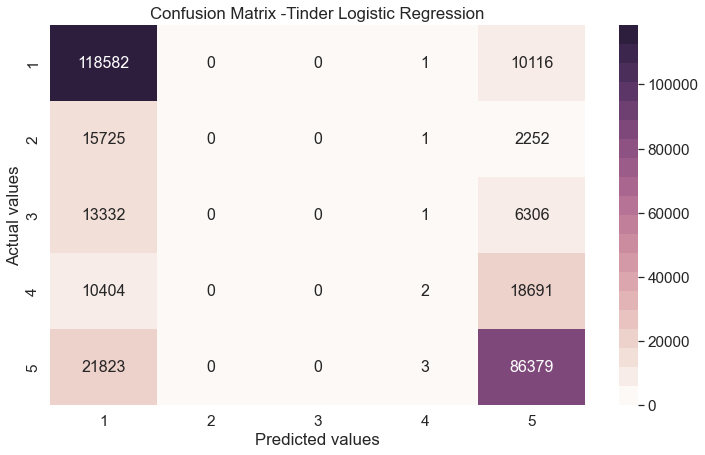

In [8]:
#reused code for the confusion matrix
cmap= sn.cubehelix_palette(light=0.98, dark=0.15, n_colors=20)
# cm_1 = confusion_matrix(y_pred,y_test)
df_cm = pd.DataFrame(cm_1.T, range(5), range(5))
plt.figure(figsize=(12,7))
sn.set(font_scale=1.4) # for label size
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap=cmap, fmt='d',ax=ax) # font size
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_title('Confusion Matrix -Tinder Logistic Regression');
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5']); 
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])
#plt.savefig("D:\\CM1-kfold.svg", format="svg")
plt.show()

#### Assuming that the optimal params are the same for all sets, we will train the Hinge and Bumble Models using the same params

### Bumble MLR Model

In [9]:
#Gets x and y data, and then splits that data into training and testing data
x, y = get_data(df_B)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

model= LogisticRegression(C=10, penalty = 'l2', solver = 'lbfgs', multi_class='multinomial', n_jobs=-1, max_iter=200000)
model.fit(x_train, y_train)
model.score(x_test,y_test)

fold= StratifiedKFold(n_splits=10, shuffle=True)
y_predict = cross_val_predict(model,x,y,cv=fold)
cm_2 = confusion_matrix(y_predict,y)

In [10]:
model.score(x_test,y_test)

0.6150271107668474

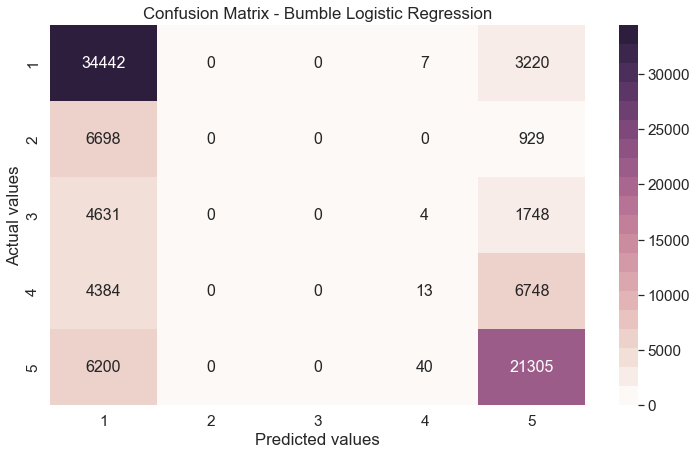

In [11]:
#reused code for the confusion matrix
cmap= sn.cubehelix_palette(light=0.98, dark=0.15, n_colors=20)
# cm_1 = confusion_matrix(y_pred,y_test)
df_cm = pd.DataFrame(cm_2.T, range(5), range(5))
plt.figure(figsize=(12,7))
sn.set(font_scale=1.4) # for label size
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap=cmap, fmt='d',ax=ax) # font size
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_title('Confusion Matrix - Bumble Logistic Regression');
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5']); 
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])
#plt.savefig("D:\\CM1-kfold.svg", format="svg")
plt.show()

### Hinge MLR Model

In [12]:
#Gets x and y data, and then splits that data into training and testing data
x, y = get_data(df_H)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

model= LogisticRegression(C=10, penalty = 'l2', solver = 'lbfgs', multi_class='multinomial', n_jobs=-1, max_iter=200000)
model.fit(x_train, y_train)
model.score(x_test,y_test)

fold= StratifiedKFold(n_splits=10, shuffle=True)
y_predict = cross_val_predict(model,x,y,cv=fold)
cm_3 = confusion_matrix(y_predict,y)

In [13]:
model.score(x_test,y_test)

0.5507569425095198

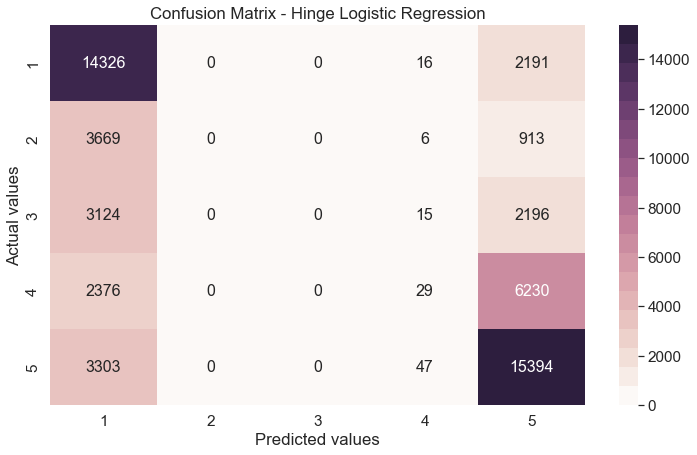

In [14]:
#reused code for the confusion matrix
cmap= sn.cubehelix_palette(light=0.98, dark=0.15, n_colors=20)
# cm_1 = confusion_matrix(y_pred,y_test)
df_cm = pd.DataFrame(cm_3.T, range(5), range(5))
plt.figure(figsize=(12,7))
sn.set(font_scale=1.4) # for label size
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap=cmap, fmt='d',ax=ax) # font size
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_title('Confusion Matrix - Hinge Logistic Regression');
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5']); 
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])
#plt.savefig("D:\\CM1-kfold.svg", format="svg")
plt.show()